In [3]:
interactive = False  # Set this variable to True to run an interactive
                     # simulator. This will not work on CoCalc.

import matplotlib
if interactive:
    matplotlib.use('TkAgg')

import pylab
import random
import numpy as np

In [14]:
class TrafficSimulator(object):


    def __init__(self, length=50, density=0.2, interactive=False, max_velocity = 5, p = None):
        '''
        Initialize new TrafficSimulator objects with the default parameter
        settings.

        Inputs:

         * length (int) The number of cells in the cellular automaton.
           Default: 50.

         * density (float) The proportion of cells that will be active (contain
           a car) when the cellular automaton is initialized. The active cells
           will be at random locations along the length of the CA. Default: 0.2.

         * interactive (bool) Whether or not we are running an interactive
           simulation. In CoCalc we have to run in non-interactive mode (False),
           but in your local Python environment you should be able to run in
           interactive mode (True). Default: False.

        '''
        self.interactive = interactive
        self.length = length
        self.density = density
        self.max_velocity = max_velocity
        self.p = p

        # Arrays for storing the current state and the next state (when we are
        # busy doing a state update).
        self.current_state = np.zeros(self.length)
        self.next_state = np.zeros(self.length)

    def initialize(self):
        '''
        This will be called by the interactive pycxsimulator whenever the Reset
        button is clicked.
        '''
        # Set up a random initial state where the fraction of 1s in the array
        # equals the density parameter.
        random_indices = np.random.choice(
            range(self.length),
            size=int(round(self.density * self.length)),
            replace=False)
        self.current_state.fill(-1)
        self.current_state[random_indices] = 0

        self.time = 0

    def draw(self):
        '''
        Draw the current state of the cellular automaton.
        '''
        if self.interactive:
            pylab.cla()  # Clear the current figure
        else:
            pylab.figure()  # Create a new figure
        pylab.pcolor(
            self.current_state.reshape((1, self.length)),
            vmin = 0,
            vmax = 1,
            cmap = pylab.cm.binary)
        pylab.axis('image')
        pylab.title('density = ' + str(self.density) + '; t = ' + str(self.time))
        if not self.interactive:
            pylab.show()

    def step(self):
        '''
        Update the state of the cellular automaton.
        '''
        # Update all cells, except the boundaries.
        for i in range(1, self.length - 1):
            if self.current_state[i] != -1:
                if self.current_state[i] < self.max_velocity:
                    self.current_state[i] += 1
                for j in range(int(self.current_state[i])):
                    if self.current_state[i + j +1] != -1:
                        self.current_state[i] -= j
                        break
                next_indice = int(i + self.current_state[i]) % self.length
                self.next_state[next_indice] = self.current_state[i]
        self.current_state, self.next_state = self.next_state, np.zeros(self.length)       

    def set_density(self, value=None):
        '''
        The density of cars on the road. Only affects initialization (reset) of
        the simulation. The density must be a value between 0 and 1.
        '''
        if value is not None:
            self.density = min(1, max(0, float(value)))
        return self.density

Initial state:


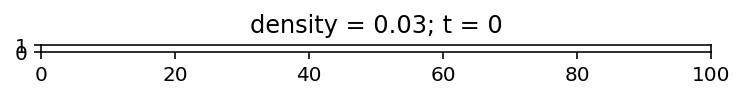

Next 5 states:


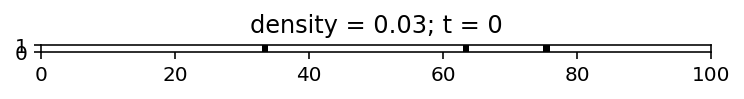

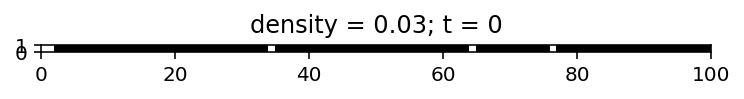

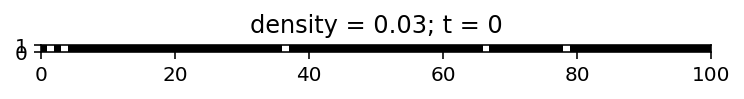

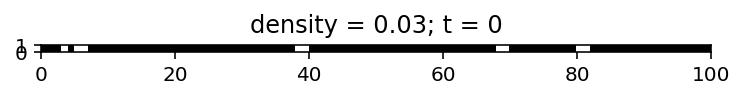

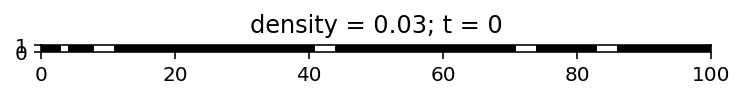


After 100 steps:


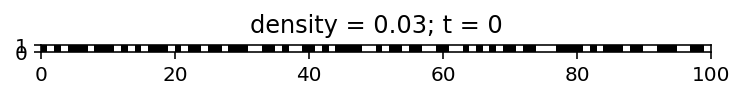

In [16]:
sim = TrafficSimulator(length=100, density=0.03, interactive=interactive)

if interactive:
    # Set up the interactive user interface.
    import pycxsimulator
    gui = pycxsimulator.GUI(parameterSetters=[sim.set_density])
    gui.start(func=[sim.initialize, sim.draw, sim.step])

else:
    # Run the simulator for 100 steps and show some of the steps.
    print('Initial state:')
    sim.initialize()
    sim.draw()

    print('Next 5 states:')
    for i in range(5):
        sim.step()
        sim.draw()
        print('')

    print('After 100 steps:')
    for i in range(95):
        sim.step()
    sim.draw()